In [ ]:
!wget -c https://archive.ics.uci.edu/static/public/45/heart+disease.zip -O heart_disease.zip
!unzip -o heart_disease.zip -d heart_disease
!rm heart_disease.zip

--2024-01-04 12:02:25--  https://archive.ics.uci.edu/static/public/45/heart+disease.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heart_disease.zip’

heart_disease.zip       [ <=>                ] 125.87K  --.-KB/s    in 0.1s    

2024-01-04 12:02:26 (861 KB/s) - ‘heart_disease.zip’ saved [128894]

Archive:  heart_disease.zip
  inflating: heart_disease/Index     
  inflating: heart_disease/WARNING   
  inflating: heart_disease/ask-detrano  
  inflating: heart_disease/bak       
  inflating: heart_disease/cleve.mod  
  inflating: heart_disease/cleveland.data  
   creating: heart_disease/costs/
  inflating: heart_disease/costs/Index  
  inflating: heart_disease/costs/heart-disease.README  
  inflating: heart_disease/costs/heart-disease.cost  
  inflating: heart_disease/costs/heart-disease.delay

In [ ]:
# global env

DATASET='heart_disease/hungarian.data'

In [ ]:
import pandas as pd
import numpy as np
import itertools

In [ ]:
with open(DATASET, encoding='Latin1') as file:
  lines = [line.strip() for line in file.readlines()]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [ ]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [ ]:
df = df.iloc[:,1:-1]
df = df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [ ]:
df.replace(-9.0, np.nan, inplace=True)
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [ ]:
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

In [ ]:
# more wines than `df_selected.rename(columns=column_mapping, inplace=True)`
df_selected = pd.DataFrame(df_selected.values, columns=list(column_mapping.values()))

In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [ ]:
columns_to_drop = ['ca', 'slope', 'thal']

In [ ]:
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [ ]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [ ]:
mean_tbps = df_selected['trestbps'].dropna()
mean_chol = df_selected['chol'].dropna()
mean_fbs = df_selected['fbs'].dropna()
mean_restecg = df_selected['restecg'].dropna()
mean_thalach = df_selected['thalach'].dropna()
mean_exang = df_selected['exang'].dropna()

In [ ]:
mean_tbps = mean_tbps.astype(float)
mean_chol = mean_chol.astype(float)
mean_fbs = mean_fbs.astype(float)
mean_restecg = mean_restecg.astype(float)
mean_thalach = mean_thalach.astype(float)
mean_exang = mean_exang.astype(float)

In [ ]:
mean_tbps = round(mean_tbps.mean())
mean_chol = round(mean_chol.mean())
mean_fbs = round(mean_fbs.mean())
mean_restecg = round(mean_restecg.mean())
mean_thalach = round(mean_thalach.mean())
mean_exang = round(mean_exang.mean())

In [ ]:
mean_tbps, mean_chol, mean_fbs, mean_restecg, mean_exang

(133, 251, 0, 0, 0)

In [ ]:
fill_values = {
    'trestbps': mean_tbps,
    'chol': mean_chol,
    'fbs': mean_fbs,
    'restecg': mean_restecg,
    'thalach': mean_thalach,
    'exang': mean_exang,
}

In [ ]:
df_clean = df_selected.fillna(value=fill_values)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
duplicate_rows = df_clean.duplicated()

In [ ]:
df_clean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
df_clean[df_clean.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
df_clean = df_clean.drop_duplicates()
df_clean[df_clean.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
df_clean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cmap_skyblue = plt.get_cmap('Blues')

In [ ]:
df_clean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

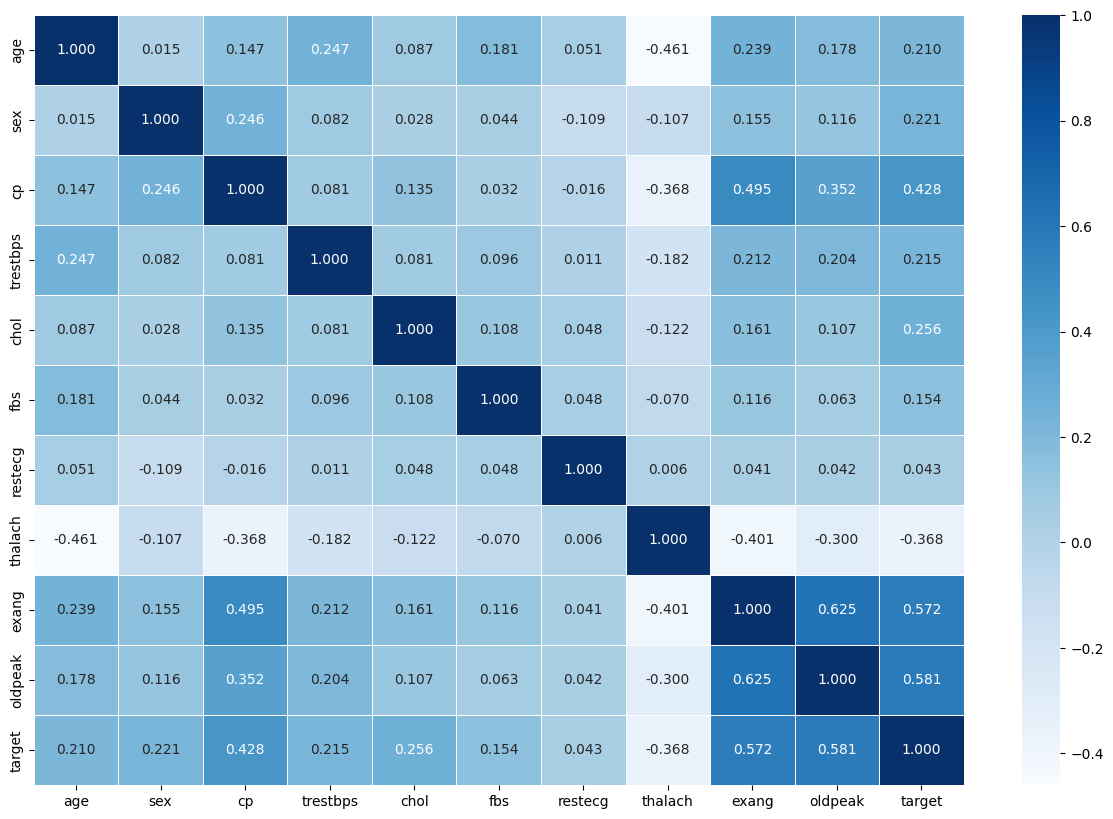

In [ ]:
corr_mat=df_clean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt='.3f', cmap=cmap_skyblue)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [ ]:
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
x = df_clean.drop('target', axis=1).values
y = df_clean.iloc[:,-1]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

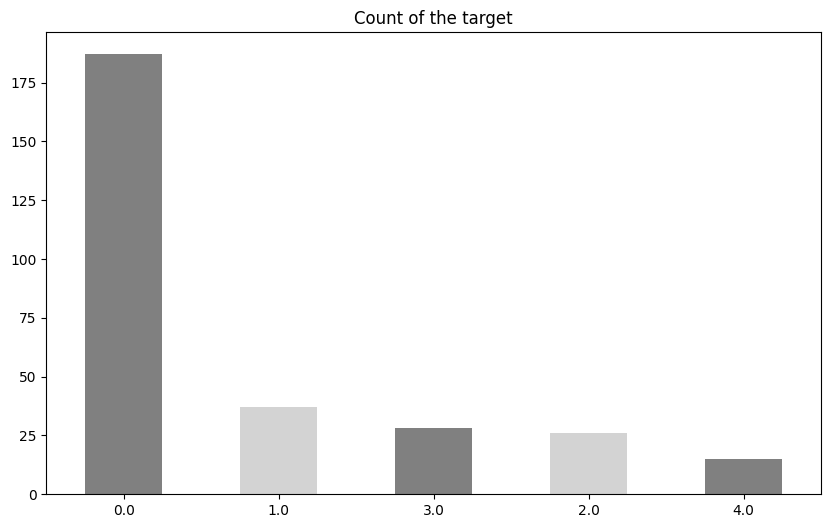

In [ ]:
df_clean['target'].value_counts().plot(kind='bar', figsize=(10, 6), color=['grey', 'lightgrey'])
plt.title('Count of the target')
plt.xticks(rotation=0)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=4)
x_smote_resampled, y_smote_resampled = smote.fit_resample(x, y)

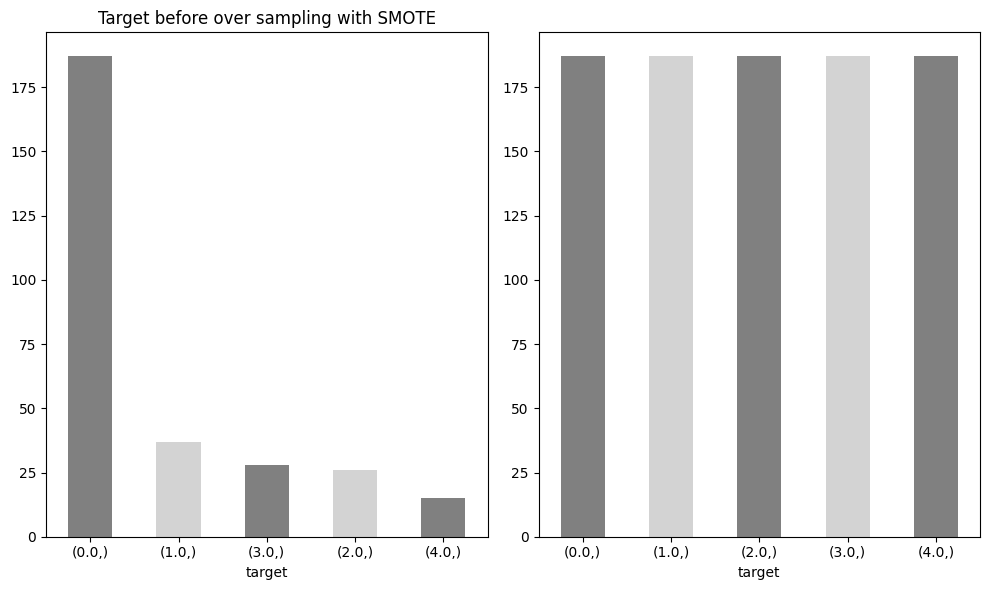

In [ ]:
plt.figure(figsize=(12, 4))
df_y = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
df_y.value_counts().plot(kind='bar', figsize=(10, 6), color=['grey', 'lightgrey', 'grey', 'lightgrey'])
plt.title('Target before over sampling with SMOTE')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df_y_smote_resampled = pd.DataFrame(data=y_smote_resampled)

df_y_smote_resampled.value_counts().plot(kind='bar', figsize=(10, 6), color=['grey', 'lightgrey', 'grey', 'lightgrey'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
df_y = pd.DataFrame(data=y)
df_y.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
df_y_smote_resampled = pd.DataFrame(data=y_smote_resampled)
df_y_smote_resampled.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [ ]:
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_smote_resampled_normal = scaler.fit_transform(x_smote_resampled)
len(x_smote_resampled_normal)

935

In [ ]:
df_check_x = pd.DataFrame(x_smote_resampled_normal)
df_check_x.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563392,0.844084,0.816274,0.404355,0.345803,0.097300,0.111825,0.450302,0.591376,0.229312
std,0.180395,0.331939,0.275610,0.148119,0.122266,0.255467,0.198018,0.200241,0.453690,0.197241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473061,1.000000,0.666667,0.291963,0.266497,0.000000,0.000000,0.308699,0.000000,0.007050
50%,0.578947,1.000000,1.000000,0.393669,0.332046,0.000000,0.000000,0.442814,0.913084,0.206914
75%,0.684211,1.000000,1.000000,0.489505,0.392205,0.000000,0.147406,0.584599,1.000000,0.390363
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote_resampled, y_smote_resampled, test_size=.2, random_state=42, stratify=y_smote_resampled)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

def evaluation(y_test, y_pred):

  return dict(
      accuracy=accuracy_score(y_test, y_pred),
      recall=recall_score(y_test, y_pred, average='weighted'),
      precision=precision_score(y_test, y_pred, average='weighted'),
      f1_score=f1_score(y_test, y_pred, average='weighted'),
  )

def pprint(data):
  for k, v in data.items():
    print(k, '=', v)


# Oversample

## *KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(x_test)

eval_knn = evaluation(y_test, y_pred_knn)
pprint(eval_knn)

print(classification_report(y_test, y_pred_knn))

accuracy = 0.7540106951871658
recall = 0.7540106951871658
precision = 0.7458368397715428
f1_score = 0.7429877791867205
              precision    recall  f1-score   support

         0.0       0.62      0.39      0.48        38
         1.0       0.68      0.81      0.74        37
         2.0       0.79      0.84      0.82        37
         3.0       0.76      0.84      0.80        38
         4.0       0.87      0.89      0.88        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.75      0.75      0.74       187



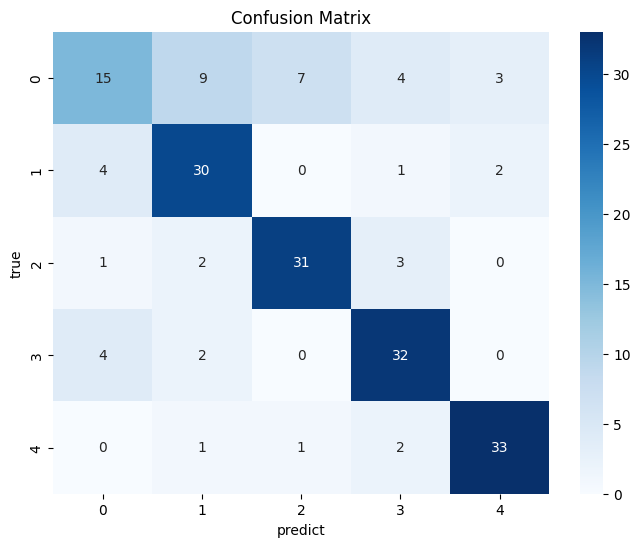

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

## *Random Forest*

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

eval_rf = evaluation(y_test, y_pred_rf)
pprint(eval_rf)

print(classification_report(y_test, y_pred_rf))

accuracy = 0.9197860962566845
recall = 0.9197860962566845
precision = 0.9208512673362027
f1_score = 0.9198801269303826
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.89      0.89      0.89        37
         2.0       0.94      0.92      0.93        37
         3.0       0.88      0.95      0.91        38
         4.0       0.95      0.95      0.95        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



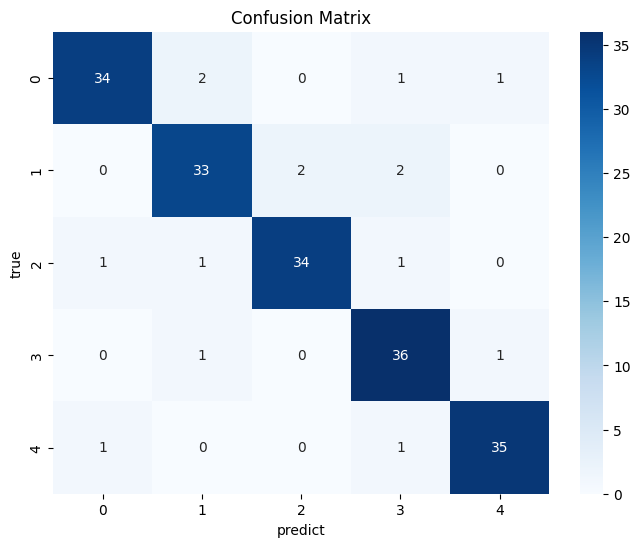

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

## *XGBOOST*

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=.1, n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)

eval_xgb = evaluation(y_test, y_pred_xgb)
pprint(eval_xgb)

print(classification_report(y_test, y_pred_xgb))

accuracy = 0.893048128342246
recall = 0.893048128342246
precision = 0.8930898813251754
f1_score = 0.8928802811478073
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.89      0.86      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.92      0.89      0.91        38
         4.0       0.89      0.89      0.89        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



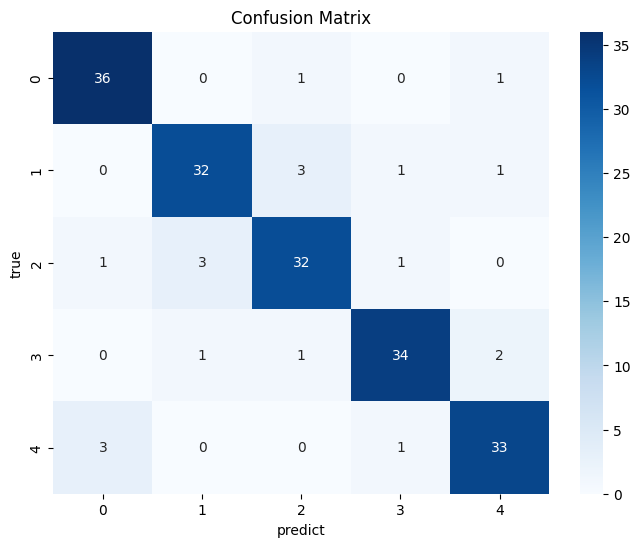

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

# Oversample + Normalization

## *KNN*

In [ ]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_smote_resampled_normal, y_smote_resampled, test_size=.2, random_state=42, stratify=y_smote_resampled)

In [ ]:
knn_model_norm = KNeighborsClassifier(n_neighbors=3)
knn_model_norm.fit(x_train_norm, y_train_norm)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn_norm = knn_model_norm.predict(x_test_norm)

eval_knn_norm = evaluation(y_test_norm, y_pred_knn_norm)
pprint(eval_knn_norm)

print(classification_report(y_test_norm, y_pred_knn_norm))

accuracy = 0.839572192513369
recall = 0.839572192513369
precision = 0.8479609582192078
f1_score = 0.8375774404153272
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85        38
         1.0       0.83      0.68      0.75        37
         2.0       0.75      0.89      0.81        37
         3.0       0.83      0.92      0.88        38
         4.0       0.85      0.95      0.90        37

    accuracy                           0.84       187
   macro avg       0.85      0.84      0.84       187
weighted avg       0.85      0.84      0.84       187



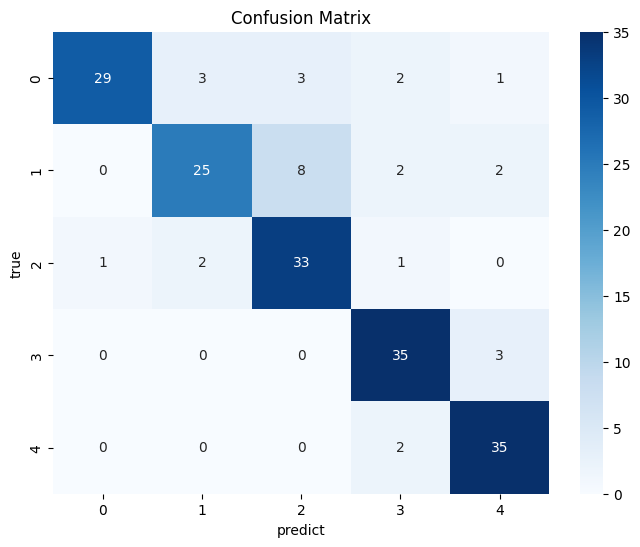

In [ ]:
cm = confusion_matrix(y_test_norm, y_pred_knn_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

## *Random Forest*

In [ ]:
rf_model_norm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_norm.fit(x_train_norm, y_train_norm)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_norm = rf_model_norm.predict(x_test_norm)

eval_rf_norm = evaluation(y_test_norm, y_pred_rf_norm)
pprint(eval_rf_norm)

print(classification_report(y_test_norm, y_pred_rf_norm))

accuracy = 0.9197860962566845
recall = 0.9197860962566845
precision = 0.9208512673362027
f1_score = 0.9198801269303826
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.89      0.89      0.89        37
         2.0       0.94      0.92      0.93        37
         3.0       0.88      0.95      0.91        38
         4.0       0.95      0.95      0.95        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



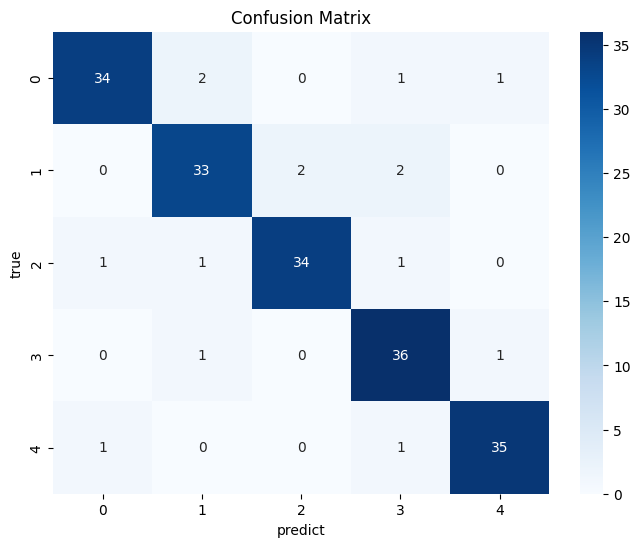

In [ ]:
cm = confusion_matrix(y_test_norm, y_pred_rf_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

## *XGBOOST*

In [ ]:
xgb_model_norm = XGBClassifier(learning_rate=.1, n_estimators=100, random_state=42)
xgb_model_norm.fit(x_train_norm, y_train_norm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_norm = xgb_model_norm.predict(x_test_norm)

eval_xgb_norm = evaluation(y_test_norm, y_pred_xgb_norm)
pprint(eval_xgb_norm)

print(classification_report(y_test_norm, y_pred_xgb_norm))

accuracy = 0.893048128342246
recall = 0.893048128342246
precision = 0.8930898813251754
f1_score = 0.8928802811478073
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.89      0.86      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.92      0.89      0.91        38
         4.0       0.89      0.89      0.89        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



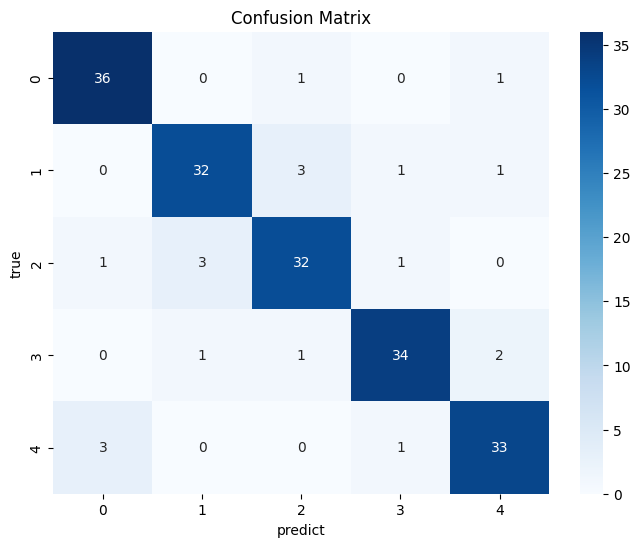

In [ ]:
cm = confusion_matrix(y_test_norm, y_pred_xgb_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

# Tunning + Oversample + Normalization

In [ ]:
import os

cpus = os.cpu_count()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

knn_param_grid = dict(
  n_neighbors=range(3, 21),
  metric=['euclidean', 'manhattan', 'chebyshev'],
  weights=['uniform', 'distance'],
  algorithm=['auto', 'ball_tree', 'kd_tree'],
  leaf_size=range(10, 61),
)

## *KNN*

In [ ]:
knn_model_ex = KNeighborsClassifier()
knn_model_tun_norm = RandomizedSearchCV(estimator=knn_model_ex, param_distributions=knn_param_grid, n_iter=100, scoring='accuracy', cv=5, n_jobs=cpus)
knn_model_tun_norm.fit(x_train_norm, y_train_norm)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100, n_jobs=2,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
knn_best_params = knn_model_tun_norm.best_params_
pprint(knn_best_params)

weights = distance
n_neighbors = 3
metric = manhattan
leaf_size = 55
algorithm = auto


In [ ]:
y_pred_knn_tun_norm = knn_model_tun_norm.predict(x_test_norm)

eval_knn_tun_norm = evaluation(y_test_norm, y_pred_knn_tun_norm)
pprint(eval_knn_tun_norm)

print(classification_report(y_test_norm, y_pred_knn_tun_norm))

accuracy = 0.8877005347593583
recall = 0.8877005347593583
precision = 0.8940520142841478
f1_score = 0.886199181441396
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        38
         1.0       0.88      0.78      0.83        37
         2.0       0.85      0.95      0.90        37
         3.0       0.88      0.92      0.90        38
         4.0       0.86      1.00      0.92        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



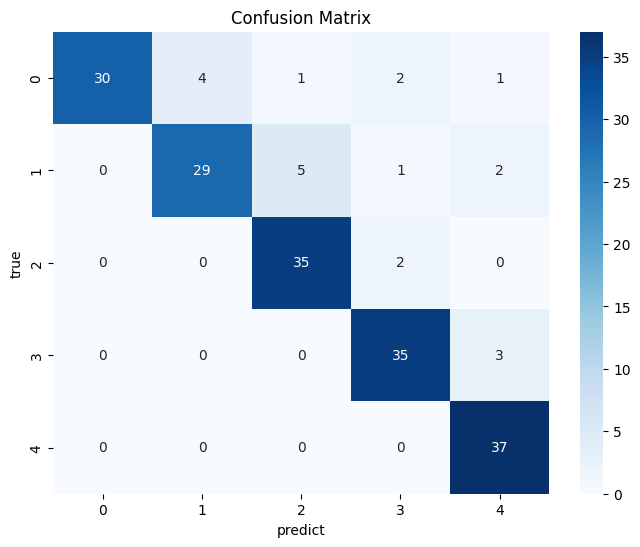

In [ ]:
cm = confusion_matrix(y_test_norm, y_pred_knn_tun_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

## *Random Forest*

In [ ]:
rf_param_grid = dict(
  n_estimators=[100, 200],
  max_depth=[10, 15],
  min_samples_leaf=[1, 2],
  min_samples_split=[2, 4],
  max_features=['sqrt', 'log2'],
  # random_state=[100, 100, 200],
)

In [ ]:
rf_model_ex = RandomForestClassifier()
rf_model_tun_norm = RandomizedSearchCV(estimator=rf_model_ex, param_distributions=rf_param_grid, n_iter=32, cv=5, n_jobs=cpus)
rf_model_tun_norm.fit(x_train_norm, y_train_norm)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=32,
                   n_jobs=2,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200]})

In [ ]:
rf_best_params = rf_model_tun_norm.best_params_
pprint(rf_best_params)

n_estimators = 100
min_samples_split = 2
min_samples_leaf = 1
max_features = log2
max_depth = 15


In [ ]:
y_pred_rf_tun_norm = rf_model_tun_norm.predict(x_test_norm)

eval_rf_tun_norm = evaluation(y_test_norm, y_pred_rf_tun_norm)
pprint(eval_rf_tun_norm)

print(classification_report(y_test_norm, y_pred_rf_tun_norm))

accuracy = 0.9090909090909091
recall = 0.9090909090909091
precision = 0.9117926381264275
f1_score = 0.9094407388122135
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.94      0.89      0.92        37
         2.0       0.92      0.89      0.90        37
         3.0       0.84      0.95      0.89        38
         4.0       0.92      0.92      0.92        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



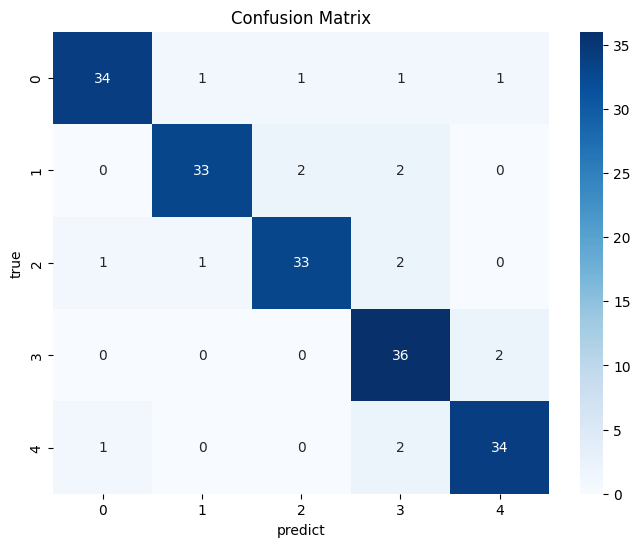

In [ ]:
cm = confusion_matrix(y_test_norm, y_pred_rf_tun_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

## *XGBOOST*

In [ ]:
xgb_param_grid = dict(
  n_estimators=[100, 200],
  max_depth=[3, 5, 7],
  learning_rate=[0.01, 0.1],
  gamma=[0, 0.1],
  colsample_bytree=[0.7, 0.8],
)

In [ ]:
xgb_model_ex = XGBClassifier()
xgb_model_tun_norm = RandomizedSearchCV(estimator=xgb_model_ex, param_distributions=xgb_param_grid, n_iter=48, cv=5, n_jobs=cpus)
xgb_model_tun_norm.fit(x_train_norm, y_train_norm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=48, n_jobs=2,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [ ]:
xgb_best_params = xgb_model_tun_norm.best_params_
pprint(xgb_best_params)

n_estimators = 100
max_depth = 7
learning_rate = 0.1
gamma = 0
colsample_bytree = 0.7


In [ ]:
y_pred_xgb_tun_norm = xgb_model_tun_norm.predict(x_test_norm)

eval_xgb_tun_norm = evaluation(y_test_norm, y_pred_xgb_tun_norm)
pprint(eval_xgb_tun_norm)

print(classification_report(y_test_norm, y_pred_xgb_tun_norm))

accuracy = 0.8983957219251337
recall = 0.8983957219251337
precision = 0.8988455988455988
f1_score = 0.8981753316966856
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.91      0.86      0.89        37
         2.0       0.92      0.89      0.90        37
         3.0       0.88      0.92      0.90        38
         4.0       0.89      0.86      0.88        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



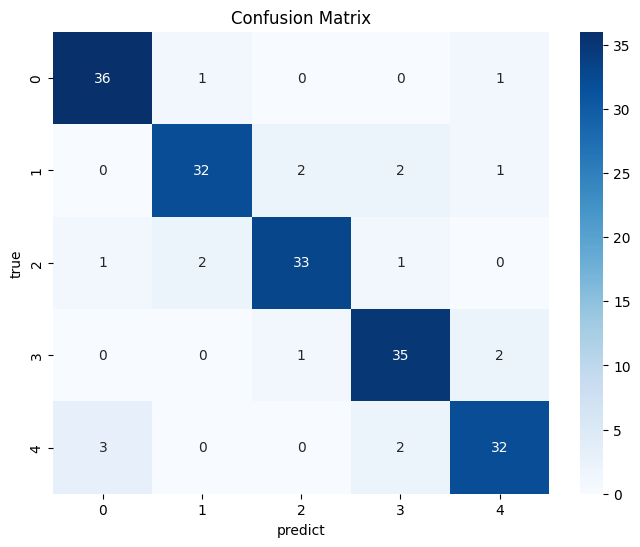

In [ ]:
cm = confusion_matrix(y_test_norm, y_pred_xgb_tun_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap_skyblue)

plt.title('Confusion Matrix')
plt.ylabel('true')
plt.xlabel('predict')
plt.show()

# Evaluation

In [ ]:
model_comp = pd.DataFrame(dict(
  Model=['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
  Accuracy=[eval_knn.get('accuracy') * 100, eval_rf.get('accuracy') * 100, eval_xgb.get('accuracy') * 100]
))

model_comp.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.401070
1,Random Forest,91.978610
2,XGBoost,89.304813


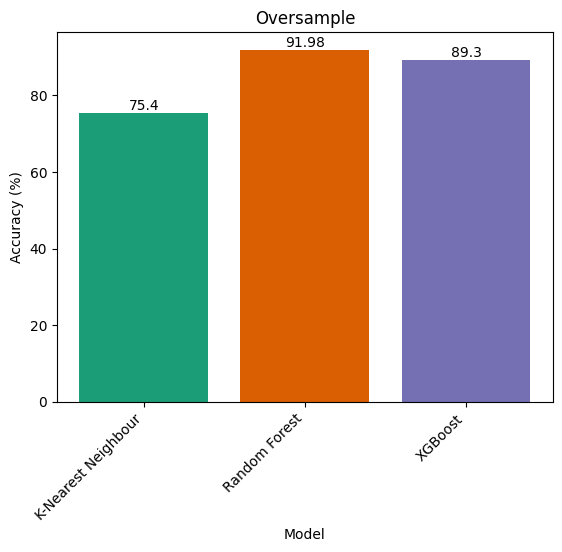

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp.get('Model'), model_comp.get('Accuracy'), color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp_norm = pd.DataFrame(dict(
  Model=['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
  Accuracy=[eval_knn_norm.get('accuracy') * 100, eval_rf_norm.get('accuracy') * 100, eval_xgb_norm.get('accuracy') * 100]
))

model_comp_norm.head()

,Model,Accuracy
0,K-Nearest Neighbour,83.957219
1,Random Forest,91.978610
2,XGBoost,89.304813


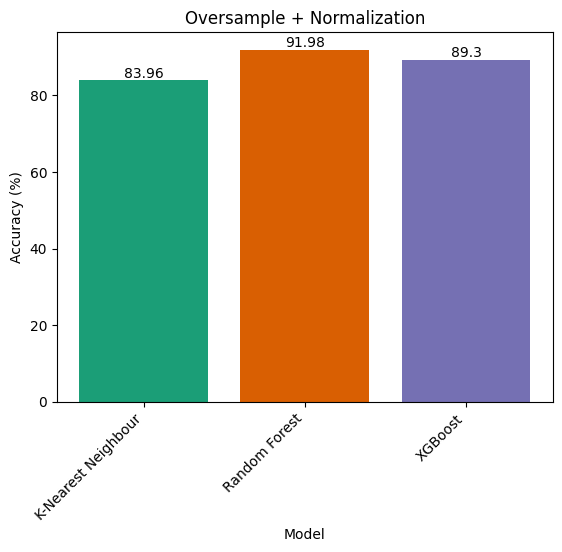

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp_norm.get('Model'), model_comp_norm.get('Accuracy'), color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample + Normalization')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
model_comp_tun_norm = pd.DataFrame(dict(
  Model=['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
  Accuracy=[eval_knn_tun_norm.get('accuracy') * 100, eval_rf_tun_norm.get('accuracy') * 100, eval_xgb_tun_norm.get('accuracy') * 100]
))

model_comp_tun_norm.head()

,Model,Accuracy
0,K-Nearest Neighbour,88.770053
1,Random Forest,90.909091
2,XGBoost,89.839572


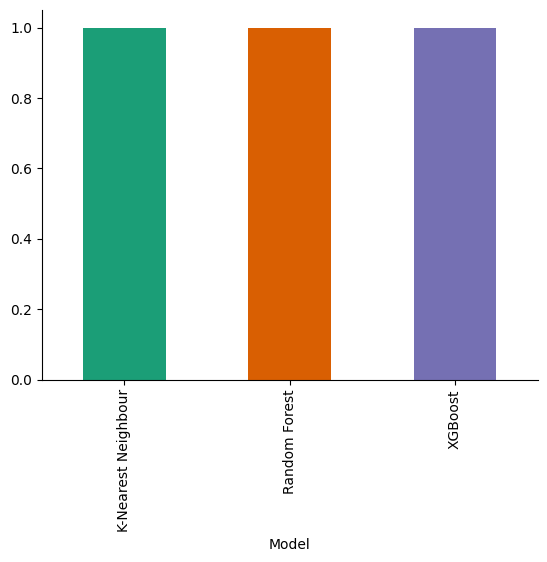

In [ ]:
model_comp_tun_norm.groupby('Model').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

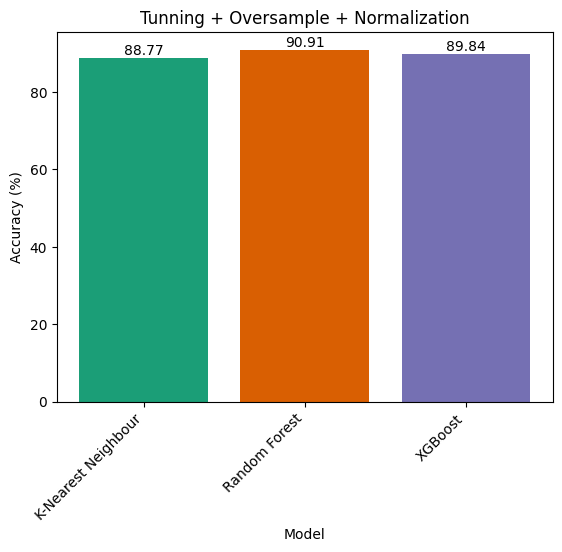

In [ ]:
fig, ax = plt.subplots()
bars = plt.bar(model_comp_tun_norm.get('Model'), model_comp_tun_norm.get('Accuracy'), color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Tunning + Oversample + Normalization')
plt.xticks(rotation=45, ha='right')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.savefig('model-tun-norm-graph-accuracy.png')
plt.show()

# Streamlit

In [ ]:
list(column_mapping.values())

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
df_selected.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
import json

with open('names.json', 'w') as stream:
  json.dump(list(column_mapping.values()), stream)

In [ ]:
import joblib

joblib.dump(knn_model_tun_norm, 'knn-model-tun-norm.jbl')
joblib.dump(rf_model_tun_norm, 'rf-model-tun-norm.jbl')
joblib.dump(xgb_model_tun_norm, 'xgb-model-tun-norm.jbl')

['xgb-model-tun-norm.jbl']

In [ ]:
!pip list | grep -Ei 'xgboost|scikit|matplotlib|joblib|numpy|seaborn|streamlit|pandas|imbalance'

geopandas                        0.13.2
imbalanced-learn                 0.10.1
joblib                           1.3.2
matplotlib                       3.7.1
matplotlib-inline                0.1.6
matplotlib-venn                  0.11.9
numpy                            1.23.5
pandas                           1.5.3
pandas-datareader                0.10.0
pandas-gbq                       0.19.2
pandas-stubs                     1.5.3.230304
scikit-image                     0.19.3
scikit-learn                     1.2.2
seaborn                          0.12.2
sklearn-pandas                   2.2.0
streamlit                        1.29.0
xgboost                          2.0.3


In [7]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [1]:
%%writefile app.py
import streamlit as st

st.set_page_config(
    page_title="Hungarian Heart Disease",
    page_icon=":heart:"
)

st.title("Hungarian Heart Disease")


Writing app.py


In [10]:
!npm install localtunnel
!npm audit fix
!mkdir -p log/streamlit log/localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.891s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details
npm ERR! code EAUDITNOPJSON
npm ERR! audit No package.json found: Cannot audit a project without a package.json

npm ERR! A complete log of this run can be found in:
npm ERR!     /root/.npm/_logs/2024-01-05T09_18_30_293Z-debug.log


In [11]:
!streamlit run /content/app.py &>/content/log/streamlit/logs.txt &

In [17]:
!npx localtunnel --port 8501 &>/content/log/localtunnel/logs.txt &

In [2]:
!killall -9 streamlit npx

streamlit: no process found
npx: no process found


In [20]:
!ps all

F   UID     PID    PPID PRI  NI    VSZ   RSS WCHAN  STAT TTY        TIME COMMAND
